# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline



/Users/Stav/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
billboard = pd.read_csv("../assets/billboard.csv") #reading data set in
#print billboard.tail()
print billboard.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        316 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.wek          210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

In [4]:
billboard.loc['x1st_week':] = billboard.loc['x1st_week':].astype(float)
billboard.loc['time'] = billboard['time'].astype(%time)
billboard.dtypes

SyntaxError: invalid syntax (<ipython-input-4-76a77cdbe7b7>, line 2)

##### Create a data dictionary for the data set.

In [5]:
data_dict = {'year': 'Year the song was released 317',
'artist.inverted':'' ,  
'track':'track name 317',           
'time':'song length 317',            
'genre':'genre name 317',            
'date.entered':'date entered into billboard 317',    
'date.peaked':'date with the highest billboard score 316',    
'x1st.week-x76th':'score since week released 317'}
print data_dict

{'genre': 'genre name 317', 'date.peaked': 'date with the highest billboard score 316', 'x1st.week-x76th': 'score since week released 317', 'year': 'Year the song was released 317', 'track': 'track name 317', 'time': 'song length 317', 'artist.inverted': '', 'date.entered': 'date entered into billboard 317'}


##### Write a brief description of your data, and any interesting observations you've made thus far. 

Analyzing the latest generation's guilty pleasure- the music of the '00s. Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent quandary in the industry- why do we like what we like?

['year' 'artist.inverted' 'track' 'time' 'genre' 'date.entered'
 'date.peaked' 'x1st.week' 'x2nd.week']

interesting findings: Theres lots of different genres and even the Thong song from the famous rapper sisqo. Looks like the weeks refer to how many weeks the particular song has been on the billboard and what is the ranking.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

In [6]:
billboard = pd.read_csv('../assets/billboard.csv')
import string 
print(string.ascii_lowercase) #print alphabet
billboard.columns = [
    ''.join([
            y for y in x.lower() 
            if y in string.ascii_lowercase+' '+'123456789'+'.'    # filter only allow if y in alphabet or ' ' or integers or ., replace it
        ]).replace(' ','_').replace('.','_')
    for x in billboard.columns
]
billboard

        
billboard = billboard.rename(columns = {'artist_inverted':'artist'})    #rename column as artist
billboard.head()


abcdefghijklmnopqrstuvwxyz


,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x67th_week,x68th_week,x69th_week,x7th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
billboard.columns = map(lambda x: x.replace('x', ''), billboard)

billboard.columns = ['year', 'artist', 'track', 'time', 'genre', 'date_entered',
       'date_peaked', '1st_week', '2nd_week', '3rd_week', '4th_week',
       '5th_week', '6th_week', '7th_week', '8th_week', '9th_week',
       '10th_week', '11th_week', '12th_week', '13th_wek', '14th_week',
       '15th_week', '16th_week', '17th_week', '18th_week', '19th_week',
       '20th_week', '21st_week', '22nd_week', '23rd_week', '24th_week',
       '25th_week', '26th_week', '27th_week', '28th_week', '29th_week',
       '30th_week', '31st_week', '32nd_week', '33rd_week', '34th_week',
       '35th_week', '36th_week', '37th_week', '38th_week', '39th_week',
       '40th_week', '41st_week', '42nd_week', '43rd_week', '44th_week',
       '45th_week', '46th_week', '47th_week', '48th_week', '49th_week',
       '50th_week', '51st_week', '52nd_week', '53rd_week', '54th_week',
       '55th_week', '56th_week', '57th_week', '58th_week', '59th_week',
       '60th_week', '61st_week', '62nd_week', '63rd_week', '64th_week',
       '65th_week', '66th_week', '67th_week', '68th_week', '69th_week',
       '70th_week', '71st_week', '72nd_week', '73rd_week', '74th_week',
       '75th_week', '76th_week']




##manually edited names 


In [10]:

clean_billboard = billboard.loc[:,:'66th_week']   # slice the data up to the 66th week, since all the values after are NaN


#print pd.to_datetime(clean_billboard['date_entered'])



##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [48]:
#clean_billboard.info()
clean_billboard[['track','artist','genre']]
weeks = clean_billboard.iloc[:,7:].columns.values.tolist()
print weeks


melted = pd.melt(clean_billboard, id_vars = ['track','artist','genre'], value_vars = ['1st_week','2nd_week'])
#melted

melted_suhhhhh = pd.melt(clean_billboard, id_vars = ['track','artist','genre'], value_vars = weeks, var_name = 'week', value_name = 'ranking')
melted_suhhhhh
#subset_long = pd.melt(clean_billboard, id_vars = ['track','artist','genre'], value_vars = clean_billboard.ix[7:], var_name='week', value_name='ranking')


# subset_long.describe()
# print subset_long

# subset_new = subset_long[['track','artist','value']]
#         #var_name='variable',#             value_name='value')
# print subset_new.shape
# subset_new.index = subset_long['variable']
# subset_new


#week1 = subset_long[subset_long['week'] == 'x1st.week']
#print week1.columns    #how our billboard stacks for week 1



['1st_week', '2nd_week', '3rd_week', '4th_week', '5th_week', '6th_week', '7th_week', '8th_week', '9th_week', '10th_week', '11th_week', '12th_week', '13th_wek', '14th_week', '15th_week', '16th_week', '17th_week', '18th_week', '19th_week', '20th_week', '21st_week', '22nd_week', '23rd_week', '24th_week', '25th_week', '26th_week', '27th_week', '28th_week', '29th_week', '30th_week', '31st_week', '32nd_week', '33rd_week', '34th_week', '35th_week', '36th_week', '37th_week', '38th_week', '39th_week', '40th_week', '41st_week', '42nd_week', '43rd_week', '44th_week', '45th_week', '46th_week', '47th_week', '48th_week', '49th_week', '50th_week', '51st_week', '52nd_week', '53rd_week', '54th_week', '55th_week', '56th_week', '57th_week', '58th_week', '59th_week', '60th_week', '61st_week', '62nd_week', '63rd_week', '64th_week', '65th_week', '66th_week']


,track,artist,genre,week,ranking
0,Independent Women Part I,Destiny's Child,Rock,1st_week,78.0
1,"Maria, Maria",Santana,Rock,1st_week,15.0
2,I Knew I Loved You,Savage Garden,Rock,1st_week,71.0
3,Music,Madonna,Rock,1st_week,41.0
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",Rock,1st_week,57.0
5,Doesn't Really Matter,Janet,Rock,1st_week,59.0
6,Say My Name,Destiny's Child,Rock,1st_week,83.0
7,Be With You,"Iglesias, Enrique",Latin,1st_week,63.0
8,Incomplete,Sisqo,Rock,1st_week,77.0
9,Amazed,Lonestar,Country,1st_week,81.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

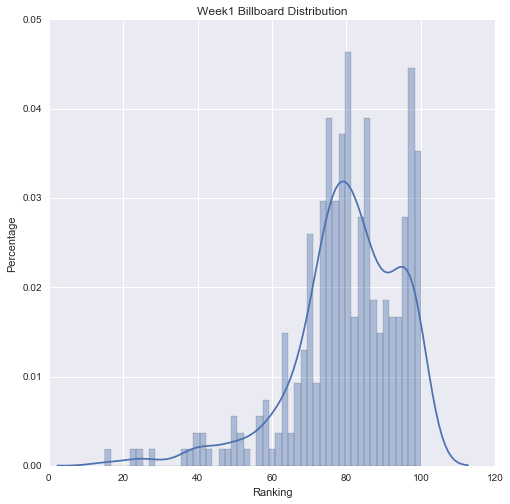

In [47]:
sns.set(rc={"figure.figsize": (8, 8)})
g = sns.distplot(clean_billboard['1st_week'],50)
g.set_title('Week1 Billboard Distribution')
g.set_xlabel('Ranking')
g.set_ylabel('Percentage')

In [55]:
# week 1 sorted ranking now write function to get data on all weeks for these songs

print 'worst:',week.sort('ranking', ascending = True).head(10), '\n''\n''\n'
print 'best:', week.sort('ranking', ascending = True).head(10)

worst:                                        track               artist    genre  \
20605               Independent Women Part I      Destiny's Child     Rock   
20606                           Maria, Maria              Santana     Rock   
20607                     I Knew I Loved You        Savage Garden     Rock   
20608                                  Music              Madonna     Rock   
20609  Come On Over Baby (All I Want Is You)  Aguilera, Christina     Rock   
20610                  Doesn't Really Matter                Janet     Rock   
20611                            Say My Name      Destiny's Child     Rock   
20612                            Be With You    Iglesias, Enrique    Latin   
20613                             Incomplete                Sisqo     Rock   
20614                                 Amazed             Lonestar  Country   

            week  ranking  
20605  66th_week      NaN  
20606  66th_week      NaN  
20607  66th_week      NaN  
20608  66th_week      

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In [52]:
for i in weeks:
    week = melted_suhhhhh[melted_suhhhhh['week'] == i]
    print week.sort('ranking', ascending = True).head(5)[['track','artist','genre','ranking', 'week']]


/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


                track                        artist    genre  ranking  \
1        Maria, Maria                       Santana     Rock     15.0   
80   This Time Around                        Hanson  Country     22.0   
45         There U Go                          Pink     Rock     25.0   
114           Crybaby                 Carey, Mariah     Rock     28.0   
35           Hot Boyz  Elliott, Missy "Misdemeanor"      Rap     36.0   

         week  
1    1st_week  
80   1st_week  
45   1st_week  
114  1st_week  
35   1st_week  
                track                        artist    genre  ranking  \
318      Maria, Maria                       Santana     Rock      8.0   
362        There U Go                          Pink     Rock     15.0   
347       Bye Bye Bye                        N'Sync     Rock     20.0   
352          Hot Boyz  Elliott, Missy "Misdemeanor"      Rap     21.0   
397  This Time Around                        Hanson  Country     22.0   

         week  
318  2nd_w

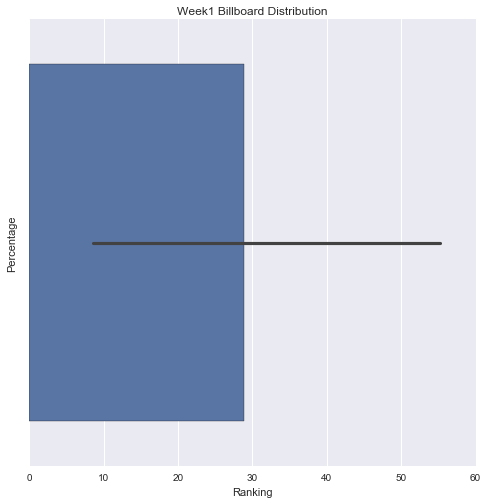

In [66]:
##### average rating of genres
genre_counts = clean_billboard.genre.value_counts()
sns.set(rc={"figure.figsize": (8, 8)})
g = sns.barplot(genre_counts)
g.set_title('Week1 Billboard Distribution')
g.set_xlabel('Ranking')
g.set_ylabel('Percentage')

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

In [ ]:
billboard

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 